In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

kicks = pd.read_csv('kickingdata.csv', header=0)

<bound method NDFrame.head of        Rk      Date   Tm Unnamed: 3  Opp   Result  \
0       1  11/11/19  SFO        NaN  SEA  L 24-27   
1       2  11/11/19  SFO        NaN  SEA  L 24-27   
2       3  11/11/19  SEA          @  SFO  W 27-24   
3       4  11/11/19  SFO        NaN  SEA  L 24-27   
4       5  11/11/19  SFO        NaN  SEA  L 24-27   
5       6  11/11/19  SEA          @  SFO  W 27-24   
6       7  11/10/19  ARI          @  TAM  L 27-30   
7       8  11/10/19  TAM        NaN  ARI  W 30-27   
8       9  11/10/19  KAN          @  TEN  L 32-35   
9      10  11/10/19  ATL          @  NOR   W 26-9   
10     11  11/10/19  MIN          @  DAL  W 28-24   
11     12  11/10/19  GNB        NaN  CAR  W 24-16   
12     13  11/10/19  NOR        NaN  ATL   L 9-26   
13     14  11/10/19  LAR          @  PIT  L 12-17   
14     15  11/10/19  NYJ        NaN  NYG  W 34-27   
15     16  11/10/19  MIA          @  IND  W 16-12   
16     17  11/10/19  IND        NaN  MIA  L 12-16   
17     18  11/10

In [111]:
# Write function to convert date from the given format (a string with the format mm/dd/yy) to python date format.
def convert_date(x):
    x = x.split('/')
    return datetime.date(int('20'+x[2]), int(x[0]), int(x[1]))

2019-11-10


In [112]:
# Rename column containing an @ symbol if the kicking team is the away team.
kicks.rename(columns={'Unnamed: 3':'At'}, inplace=True)

# Delete index column in csv
del kicks['Rk']

# Create boolean column if kicking team is the home team
kicks['Home'] = (kicks['At'] != '@')

# Isolate unique player id
kicks['PlayerID'] = kicks['Player'].apply(lambda x: str.split(x, '\\')[1])

# Create variable for team whose stadium the game is played at
kicks['Stadium'] = kicks.apply(lambda x: [x['Opp'],x['Tm']][x['Home']], axis='columns')

# Reformat 'Good?' column to be a boolean
kicks['Good?'] = (kicks['Good?']=='Y')

# Reformat blocked kick column to be a boolean
kicks['Blk?'] = (kicks['Blk?']=='Y')

# Reformat date column
kicks['Date'] = kicks['Date'].apply(convert_date)

In [78]:
# Group by kick distance
bydistance = kicks.groupby(['Dist']).mean()

,Good?,Blk?,Home
Dist,,,
19,1.000000,0.000000,0.437500
20,1.000000,0.000000,0.447368
21,1.000000,0.000000,0.466667
22,1.000000,0.000000,0.456522
23,0.982759,0.000000,0.568966
24,1.000000,0.000000,0.562500
25,1.000000,0.000000,0.433333
26,1.000000,0.000000,0.446429
27,0.981481,0.018519,0.407407


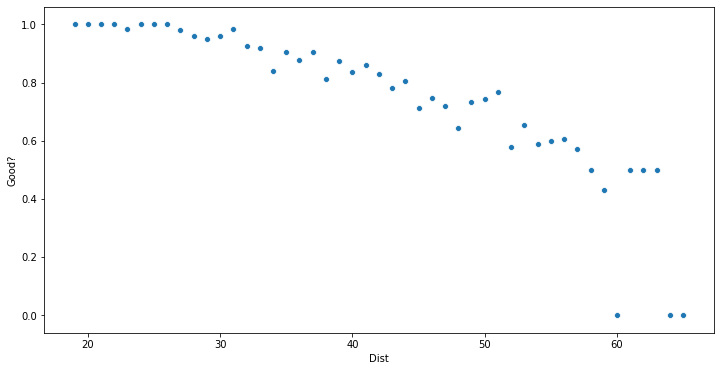

In [114]:
# Create scatter plot displaying success rate by distance of kick
plt.figure(figsize=(12,6))
sns.scatterplot(bydistance.index,bydistance['Good?'])
plt.show()

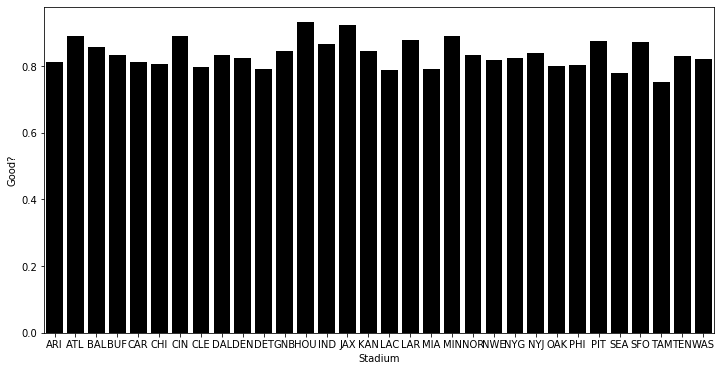

In [88]:
bystadium = kicks.groupby(['Stadium']).mean()

plt.figure(figsize=(12,6))
sns.barplot(bystadium.index, bystadium['Good?'], color='black')